In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.stats import norm, shapiro
import warnings
warnings.filterwarnings('ignore')

In [2]:
def VaRHistorical(data, alpha=0.99):
    data['returns'] = data['Close'].diff(1)
    data = data.dropna()
    return data['returns'].quantile(1-alpha)

def VaRAnalytical(data, alpha=0.99):
    data['returns'] = data['Close'].diff(1)
    mean = data['returns'].mean()
    std = data['returns'].std()
    
    return norm.ppf(1-alpha, mean, std)

In [3]:
data = yf.download('AMZN', '2020-01-01', '2022-01-01')
data = data[['Close']]
data

[*********************100%%**********************]  1 of 1 completed


,Close
Date,
2020-01-02,94.900497
2020-01-03,93.748497
2020-01-06,95.143997
2020-01-07,95.343002
2020-01-08,94.598503
...,...
2021-12-27,169.669495
2021-12-28,170.660995
2021-12-29,169.201004


Text(0.5, 1.0, 'AMZN')

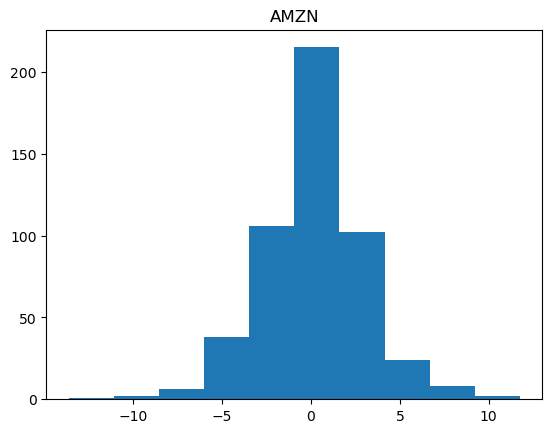

In [4]:
plt.hist(data['Close'].diff(1))
plt.title('AMZN')

In [5]:
shapiro(data['Close'])

ShapiroResult(statistic=0.825892984867096, pvalue=5.0963352195288406e-23)

In [6]:
shapiro(data['Close'].diff(1))

ShapiroResult(statistic=nan, pvalue=1.0)

In [7]:
alphas = [0.99, 0.95, 0.9]
for alpha in alphas:
    print(f'Alpha: {alpha}, VaR {VaRHistorical(data, alpha)}')

Alpha: 0.99, VaR -7.238203506469726
Alpha: 0.95, VaR -4.674851989746093
Alpha: 0.9, VaR -3.3742095947265627


In [8]:
for alpha in alphas:
    print(f'Alpha: {alpha}, VaR {VaRAnalytical(data, alpha)}')

Alpha: 0.99, VaR -6.547012123559174
Alpha: 0.95, VaR -4.587348505172017
Alpha: 0.9, VaR -3.542659081505112


In [9]:
def expectedShortfall(data, alpha=.99):
    data['returns'] = data['Close'].diff(1)
    std = data['returns'].std()
    mean = data['returns'].mean()
    return std * (norm.pdf(norm.ppf(1-alpha))/(1-alpha)) - mean

In [10]:
for alpha in alphas:
    print(f'Alpha: {alpha} ES: {expectedShortfall(data, alpha)}')

Alpha: 0.99 ES: 7.521435683531707
Alpha: 0.95 ES: 5.788919079306577
Alpha: 0.9 ES: 4.904030784398967


In [11]:
data2 = yf.download('NVDA', '2020-01-01', '2022-01-01')
data2 = data2[['Close']]
data2

[*********************100%%**********************]  1 of 1 completed


,Close
Date,
2020-01-02,59.977501
2020-01-03,59.017502
2020-01-06,59.264999
2020-01-07,59.982498
2020-01-08,60.095001
...,...
2021-12-27,309.450012
2021-12-28,303.220001
2021-12-29,300.010010


Text(0.5, 1.0, 'NVDA')

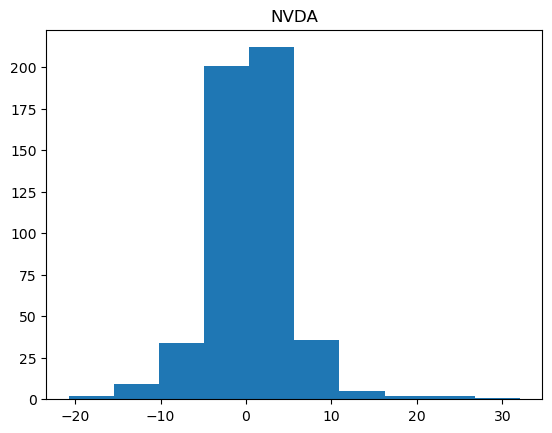

In [12]:
plt.hist(data2['Close'].diff(1))
plt.title('NVDA')

In [13]:
shapiro(data2['Close'].diff(1))

ShapiroResult(statistic=nan, pvalue=1.0)

In [14]:
for alpha in alphas:
    print(f'Alpha: {alpha}, VaR {VaRHistorical(data2, alpha)}')

Alpha: 0.99, VaR -12.397103881835935
Alpha: 0.95, VaR -6.510499572753899
Alpha: 0.9, VaR -4.351997375488281
